### **Configuration and Compatibility**

In [17]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)



/usr/local/lib/python3.9/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [19]:
tf.__version__

'2.12.0'

In [20]:
'https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv'


'https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv'

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Churn_Modelling.csv')


### **Splitting the Data**

In [23]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

geography = pd.get_dummies(x["Geography"], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)


In [24]:
x = pd.concat([x, geography, gender], axis=1)

x = x.drop(['Geography', 'Gender'], axis=1)


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



### **Feature Scaling**

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



## **Artificial Neural Network**

In [27]:
pip install --upgrade ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch 1/100
320/320 [==============================] - 2s 3ms/step - loss: 0.8901 - accuracy: 0.3941 - val_loss: 0.6604 - val_accuracy: 0.6144
Epoch 2/100
320/320 [==============================] - 1s 3ms/step - loss: 0.5907 - accuracy: 0.7175 - val_loss: 0.5508 - val_accuracy: 0.7844
Epoch 3/100
320/320 [==============================] - 1s 3ms/step - loss: 0.5285 - accuracy: 0.7894 - val_loss: 0.5132 - val_accuracy: 0.7975
Epoch 4/100
320/320 [==============================] - 1s 2ms/step - loss: 0.5003 - accuracy: 0.7936 - val_loss: 0.4889 - val_accuracy: 0.7987
Epoch 5/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4811 - accuracy: 0.7942 - val_loss: 0.4699 - val_accuracy: 0.8019
Epoch 6/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.7972 - val_loss: 0.4559 - val_accuracy: 0.8037
Epoch 7/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4553 - accuracy: 0.7967 - val_loss: 0.4449 - val_accuracy: 0.8075

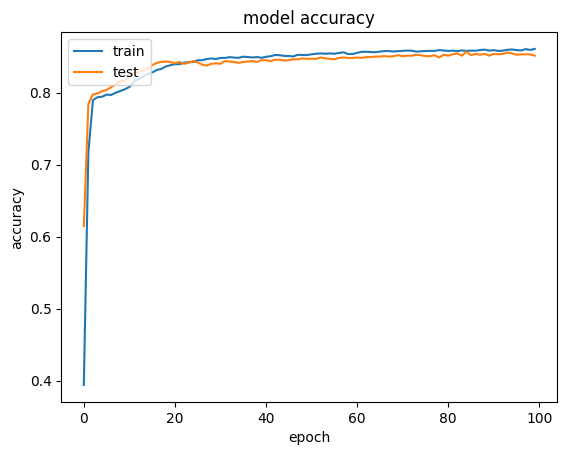

In [32]:
from IPython.core import history
from keras.engine.sequential import Sequential
import keras 
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

# Inititializaing the ANN
classifier = Sequential()

# Adding the input and the hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training Set
model_history = classifier.fit(x_train, y_train, validation_split=0.2, batch_size=20, epochs=100)


print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


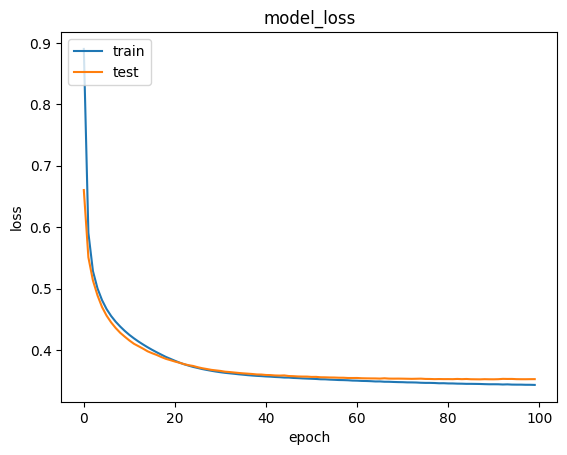

In [35]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Making the predictions and evaluating the model**

In [36]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 1ms/step


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1526   81]
 [ 206  187]]


## **Calculating the accuracy**


In [41]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

print('The accuracy score is: {} %'.format(score * 100))


The accuracy score is: 85.65 %
